In [3]:
#Prepping the notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# my custom helper functions
import helpers as hlp
import turtles
import scipy
import pandas as pd
#filter data: Naitive turle and relevant
print ("Filtering Natives ...")
natives = turtles.get_clean_data()
natives = natives[natives['Weight']!=0]
natives = natives[natives['Carapace']!=0]
natives = natives[natives['Plastron']!=0]
natives = natives[natives['Species']=='Cpb']
print ("Done")


Filtering Natives ...
Loading data source/Turtle Data.xls
2008
2009
2010
2011
2012
2013
2014
Cleaning decimals ...
Cleaning other values ...
Loading data source/MF Trapping Data.xls
Cleaning decimals ...
Cleaning other values ...
Done


In [4]:
natives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1086
Data columns (total 47 columns):
Date                            888 non-null datetime64[ns]
ID                              888 non-null object
Time                            570 non-null object
Surveyor(s)                     0 non-null float64
Weather                         377 non-null object
Capture Location                888 non-null object
Capture Method                  886 non-null object
Recapture                       887 non-null object
Species                         888 non-null object
Gender                          888 non-null object
Annuli                          888 non-null int8
Weight                          888 non-null float32
Carapace                        888 non-null float32
Plastron                        888 non-null float32
Gravid                          888 non-null bool
Nest#                           15 non-null object
Nest Site                       18 non-null object
Margin

Text(0.5,0,'Date')

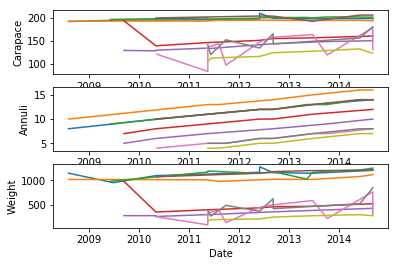

In [6]:
frequent_turtles = natives[natives.recapture_count >= 10]
frequent_turtles = frequent_turtles.ID.unique()

plt.subplot(3,1,1)
for ID in frequent_turtles:
    plt.plot(natives[natives.ID == ID].Date,natives[natives.ID == ID].Carapace)
plt.ylabel("Carapace")

plt.subplot(3,1,2)
for ID in frequent_turtles:
    plt.plot(natives[natives.ID == ID].Date,natives[natives.ID == ID].new_annuli)
plt.ylabel("Annuli")

plt.subplot(3,1,3)
for ID in frequent_turtles:
    plt.plot(natives[natives.ID == ID].Date,natives[natives.ID == ID].Weight)
plt.ylabel("Weight")

plt.xlabel("Date")



In [7]:
columns = ['ID', 'Date', 'orig_Annuli', 'new_annuli', 'gender_plus', 'Carapace', 'Weight', 'Surveyor(s)']
for ID in frequent_turtles:
    display(natives[natives.ID == ID][columns].sort_values(by='Date'))


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
64,3214,2008-08-06,10,8.0,f,191.970001,1143.0,NaN
65,3214,2009-06-29,11+C,9.0,f,194.679993,950.0,NaN
66,3214,2010-05-06,15+,10.0,f,195.399994,1094.0,NaN
67,3214,2011-05-19,Unk,11.0,f,195.839996,1125.0,NaN
68,3214,2012-05-30,8+,12.0,f_gra,197.110001,1162.0,NaN
69,3214,2012-05-31,13,12.0,f_gra,210.000000,1275.0,NaN
70,3214,2012-09-06,11+,12.0,f,198.970001,1155.0,NaN
72,3214,2013-06-19,smooth,13.0,f_gra,197.860001,1142.0,NaN
74,3214,2014-09-03,Smooth,14.0,f,198.639999,1202.0,NaN
75,3214,2014-09-04,Smooth,14.0,f,198.669998,1204.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
135,3231,2008-08-07,10+,10.0,f,192.729996,1016.0,NaN
136,3231,2011-05-19,13c,13.0,f,193.059998,1008.0,NaN
139,3231,2011-08-08,NaN,13.0,f,194.899994,975.0,NaN
140,3231,2012-09-05,12+,14.0,f,194.750000,1020.0,NaN
143,3231,2013-06-19,smooth,15.0,f,194.389999,1016.0,NaN
146,3231,2014-05-31,Smooth,16.0,f,194.639999,1075.0,NaN
147,3231,2014-09-03,Smooth,16.0,f,193.520004,1113.0,NaN
148,3231,2014-09-04,Smooth,16.0,f,196.800003,1118.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
179,3233,2009-06-08,14+,9.0,f,196.600006,980.0,NaN
180,3233,2011-05-19,NaN,11.0,f,199.759995,1166.0,NaN
181,3233,2011-05-19,13+c,11.0,f,197.330002,1188.0,NaN
182,3233,2012-05-30,11+,12.0,f,199.490005,1140.0,NaN
183,3233,2012-05-31,NaN,12.0,f_gra,200.000000,1144.0,NaN
186,3233,2012-09-05,11+,12.0,f,200.619995,1160.0,NaN
188,3233,2012-09-07,did not record,12.0,f,200.500000,1175.0,NaN
189,3233,2013-05-10,9+ smooth,13.0,f,200.929993,1022.0,NaN
190,3233,2013-06-19,12+ smooth,13.0,f,199.970001,1159.0,NaN
192,3233,2013-10-05,10+,13.0,f,201.990005,1185.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
211,3238,2009-09-14,12+C,7.0,f,193.500000,977.0,NaN
212,3238,2010-05-05,7+,8.0,m,139.000000,351.0,NaN
214,3238,2011-05-19,NaN,9.0,m,146.039993,396.0,NaN
216,3238,2012-06-01,8,10.0,m,150.850006,436.0,NaN
217,3238,2012-09-06,9,10.0,m,154.830002,458.0,NaN
218,3238,2013-06-19,8,11.0,m,156.350006,468.0,NaN
219,3238,2014-09-04,10,12.0,m,160.300003,521.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
221,3240,2009-09-14,6,5.0,m,128.899994,277.0,NaN
222,3240,2010-05-05,7+,6.0,m,128.000000,276.0,NaN
223,3240,2010-05-06,5+,6.0,m,129.399994,260.0,NaN
225,3240,2011-05-19,6C,7.0,m,134.000000,298.0,NaN
226,3240,2011-05-19,6c,7.0,m,132.789993,297.0,NaN
229,3240,2012-09-05,8,8.0,m,143.470001,354.0,NaN
231,3240,2013-10-04,8+,9.0,m,148.229996,394.0,NaN
232,3240,2014-09-03,9,10.0,m,150.149994,426.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
271,3247,2010-05-06,10+,10.0,f,199.800003,1071.0,NaN
272,3247,2012-05-31,11+,12.0,f,204.000000,1142.0,NaN
274,3247,2012-09-05,NaN,12.0,f,203.740005,1175.0,NaN
277,3247,2013-06-19,smooth,13.0,f,192.699997,1197.0,NaN
279,3247,2014-05-29,Smooth,14.0,f,205.960007,1202.0,NaN
280,3247,2014-05-31,Smooth,14.0,f,205.960007,1202.0,NaN
281,3247,2014-09-04,Smooth,14.0,f,206.110001,1214.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
332,3264,2010-05-11,4+,4.0,f,120.760002,253.0,NaN
333,3264,2011-05-19,5c,5.0,unknown,83.099998,88.0,NaN
334,3264,2011-05-19,5c,5.0,f,135.970001,337.0,NaN
335,3264,2011-08-08,NaN,5.0,f,143.649994,389.0,NaN
336,3264,2011-09-28,5,5.0,unknown,96.830002,133.0,NaN
337,3264,2012-06-01,6,6.0,f,147.399994,448.0,NaN
338,3264,2012-09-05,5+,6.0,f,157.550003,496.0,NaN
339,3264,2013-06-21,8,7.0,f,163.419998,586.0,NaN
340,3264,2013-10-06,6,7.0,m,119.070000,219.0,NaN
341,3264,2014-09-03,Smooth,8.0,f,178.380005,762.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
413,3280,2011-05-19,5c,5.0,f,141.350006,377.0,NaN
414,3280,2011-06-09,5,5.0,f,119.900002,268.0,NaN
415,3280,2011-09-28,6,5.0,f,152.210007,487.0,NaN
416,3280,2012-05-30,6,6.0,f,134.139999,367.0,NaN
419,3280,2012-09-06,8,6.0,f,165.250000,622.0,NaN
420,3280,2012-09-07,7,6.0,f,143.149994,419.0,NaN
421,3280,2013-06-21,7,7.0,f,148.880005,466.0,NaN
422,3280,2014-05-31,7,8.0,f,156.000000,519.0,NaN
423,3280,2014-09-04,10,8.0,f,180.600006,845.0,NaN


,ID,Date,orig_Annuli,new_annuli,gender_plus,Carapace,Weight,Surveyor(s)
458,3295,2011-05-19,NaN,4.0,unknown,104.430000,160.0,NaN
459,3295,2011-06-09,5c,4.0,m,111.849998,194.0,NaN
460,3295,2011-08-08,NaN,4.0,m,112.889999,198.0,NaN
461,3295,2012-05-30,4,5.0,m,115.739998,209.0,NaN
463,3295,2012-09-05,6,5.0,m,123.879997,247.0,NaN
465,3295,2013-06-19,7,6.0,m,127.059998,275.0,NaN
466,3295,2014-05-30,7,7.0,m,132.160004,297.0,NaN
467,3295,2014-05-31,7,7.0,m,132.160004,297.0,NaN
468,3295,2014-09-03,6,7.0,f,122.449997,276.0,NaN


In [9]:
resampleDFColumns = ['ID', 'orig_Annuli', 'new_annuli', 'gender_plus', 'Carapace', 'Weight']
resampleDF = natives.set_index('Date')
resampleDF.sort_index(inplace=True)
display('Min values per year')
for ID in frequent_turtles:
    print("Turtle " + str(ID))
    display(resampleDF[resampleDF.ID == ID][resampleDFColumns].resample('Y').min())

'Min values per year'

Turtle 3214


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2008-12-31,3214,8.0,f,191.970001,1143.0
2009-12-31,3214,9.0,f,194.679993,950.0
2010-12-31,3214,10.0,f,195.399994,1094.0
2011-12-31,3214,11.0,f,195.839996,1125.0
2012-12-31,3214,12.0,f,197.110001,1155.0
2013-12-31,3214,13.0,f_gra,197.860001,1142.0
2014-12-31,3214,14.0,f,198.639999,1202.0


Turtle 3231


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2008-12-31,3231.0,10.0,f,192.729996,1016.0
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN
2011-12-31,3231.0,13.0,f,193.059998,975.0
2012-12-31,3231.0,14.0,f,194.750000,1020.0
2013-12-31,3231.0,15.0,f,194.389999,1016.0
2014-12-31,3231.0,16.0,f,193.520004,1075.0


Turtle 3233


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2009-12-31,3233.0,9.0,f,196.600006,980.0
2010-12-31,NaN,NaN,NaN,NaN,NaN
2011-12-31,3233.0,11.0,f,197.330002,1166.0
2012-12-31,3233.0,12.0,f,199.490005,1140.0
2013-12-31,3233.0,13.0,f,199.970001,1022.0
2014-12-31,3233.0,14.0,f,201.470001,1208.0


Turtle 3238


,ID,orig_Annuli,new_annuli,gender_plus,Carapace,Weight
Date,,,,,,
2009-12-31,3238,12+C,7.0,f,193.500000,977.0
2010-12-31,3238,7+,8.0,m,139.000000,351.0
2011-12-31,3238,NaN,9.0,m,146.039993,396.0
2012-12-31,3238,8,10.0,m,150.850006,436.0
2013-12-31,3238,8,11.0,m,156.350006,468.0
2014-12-31,3238,10,12.0,m,160.300003,521.0


Turtle 3240


,ID,orig_Annuli,new_annuli,gender_plus,Carapace,Weight
Date,,,,,,
2009-12-31,3240,6,5.0,m,128.899994,277.0
2010-12-31,3240,5+,6.0,m,128.000000,260.0
2011-12-31,3240,6C,7.0,m,132.789993,297.0
2012-12-31,3240,8,8.0,m,143.470001,354.0
2013-12-31,3240,8+,9.0,m,148.229996,394.0
2014-12-31,3240,9,10.0,m,150.149994,426.0


Turtle 3247


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2010-12-31,3247.0,10.0,f,199.800003,1071.0
2011-12-31,NaN,NaN,NaN,NaN,NaN
2012-12-31,3247.0,12.0,f,203.740005,1142.0
2013-12-31,3247.0,13.0,f,192.699997,1197.0
2014-12-31,3247.0,14.0,f,205.960007,1202.0


Turtle 3264


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2010-12-31,3264,4.0,f,120.760002,253.0
2011-12-31,3264,5.0,f,83.099998,88.0
2012-12-31,3264,6.0,f,147.399994,448.0
2013-12-31,3264,7.0,f,119.070000,219.0
2014-12-31,3264,8.0,f,130.389999,282.0


Turtle 3280


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2011-12-31,3280,5.0,f,119.900002,268.0
2012-12-31,3280,6.0,f,134.139999,367.0
2013-12-31,3280,7.0,f,148.880005,466.0
2014-12-31,3280,8.0,f,156.000000,519.0


Turtle 3295


,ID,new_annuli,gender_plus,Carapace,Weight
Date,,,,,
2011-12-31,3295,4.0,m,104.430000,160.0
2012-12-31,3295,5.0,m,115.739998,209.0
2013-12-31,3295,6.0,m,127.059998,275.0
2014-12-31,3295,7.0,f,122.449997,276.0
